<a href="https://colab.research.google.com/github/Punyaraj7/AI/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Dense,Conv2D,MaxPool2D,BatchNormalization,Dropout,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.datasets import cifar10

In [ ]:
(xtr,ytr),(xt,yt) = cifar10.load_data()
print(xtr.shape,ytr.shape,xt.shape,yt.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
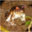

In [ ]:
xtr[0]

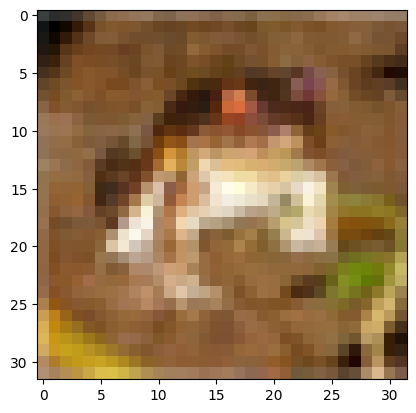

In [ ]:
plt.imshow(xtr[0],cmap='gray')

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]], dtype=uint8)
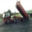

In [ ]:
xtr[2]

In [ ]:
xtr_scl = xtr.astype('float32')/255
xt_scl = xt.astype('float32')/255

In [ ]:
xtr_scl.shape

(50000, 32, 32, 3)

In [ ]:
ytr[0]

array([6], dtype=uint8)

In [ ]:
ytr_scl = to_categorical(ytr)
yt_scl = to_categorical(yt)

In [ ]:
ytr_scl.shape

(50000, 10)

In [ ]:
model = Sequential()
model.add(Input(shape=(32,32,3),))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,706 (662.91 KB)

 Trainable params: 169,514 (662.16 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
nn=model.fit(xtr_scl,ytr_scl,validation_split=0.2,epochs=100,callbacks=[es],batch_size=16)

Epoch 1/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.2911 - loss: 2.0221 - val_accuracy: 0.4980 - val_loss: 1.3995
Epoch 2/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4654 - loss: 1.4797 - val_accuracy: 0.5439 - val_loss: 1.2482
Epoch 3/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5267 - loss: 1.3334 - val_accuracy: 0.5328 - val_loss: 1.3210
Epoch 4/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5548 - loss: 1.2540 - val_accuracy: 0.6236 - val_loss: 1.0578
Epoch 5/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5898 - loss: 1.1713 - val_accuracy: 0.6046 - val_loss: 1.0965
Epoch 6/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6094 - loss: 1.1192 - val_accuracy: 0.6190 - val_loss: 1.0798
Epoch 7/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6287 - loss: 1.0815 - val_accuracy: 0.6686 - val_loss: 0.9509
Epoch 8/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6463 - loss:

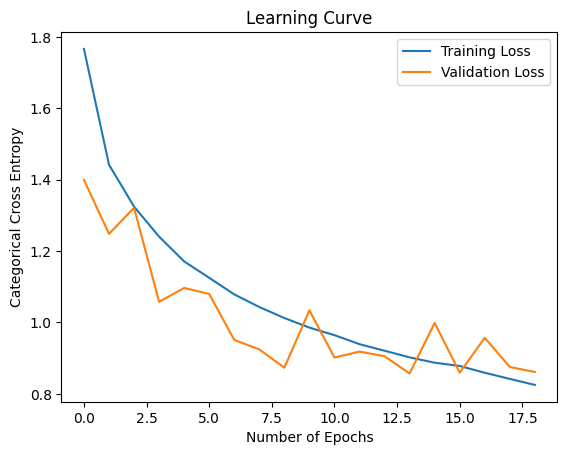

In [ ]:
##Learning curve

plt.plot(nn.history["loss"],label="Training Loss")
plt.plot(nn.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical Cross Entropy")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [ ]:
model.evaluate(xtr_scl,ytr_scl)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7999 - loss: 0.5757


[0.6337292790412903, 0.7813000082969666]

In [ ]:
model.evaluate(xt_scl,yt_scl)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7011 - loss: 0.8715


[0.8762546181678772, 0.7027000188827515]

In [ ]:
ypreds = model.predict(xt_scl,verbose=0)
fpreds = np.argmax(ypreds,axis=1)
fpreds

array([3, 8, 1, ..., 5, 4, 7])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(yt,fpreds))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.81      0.87      0.84      1000
           2       0.56      0.61      0.58      1000
           3       0.53      0.49      0.51      1000
           4       0.67      0.62      0.64      1000
           5       0.68      0.51      0.58      1000
           6       0.65      0.84      0.74      1000
           7       0.78      0.74      0.76      1000
           8       0.76      0.86      0.81      1000
           9       0.83      0.75      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



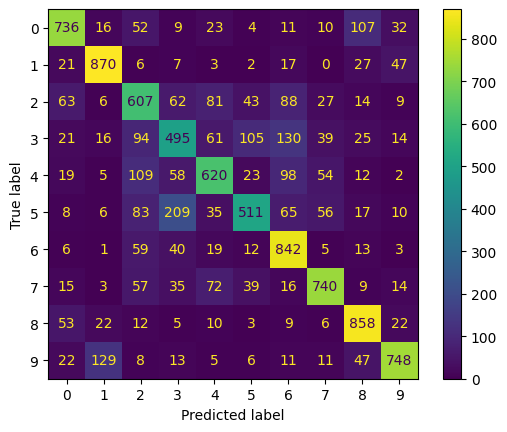

In [ ]:
ConfusionMatrixDisplay.from_predictions(yt,fpreds)